# Install and Load Packages

In [4]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("terra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("spdep")
install.packages("rgdal")
install.packages("nlme")
install.packages("MASS")
install.packages("sae")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(sae)
library(spdep)
library(rgdal)
library(nlme)
library(sf)
library(terra)
library(readxl)
library(MASS)

Loading required package: MASS

Loading required package: lme4

Loading required package: Matrix

Loading required package: spData

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sf

Linking to GEOS 3.9.1, GDAL 3.3.2, PROJ 7.2.1; sf_use_s2() is TRUE

Loading required package: sp

Please note that rgdal will be retired during October 2023,
plan transition to sf/stars/terra f

# Load Dataset

In [11]:
# Import data variabel penyerta dan hasil estimasi langsung
dataset <- read_excel("dataset_skripsi_revisi.xlsx", sheet = 1)
hasil_est_lgsg <- read_excel("Hasil_Estimasi_Langsung.xlsx")
data_x <- dataset[, -c(1,2,3,4)]

# Pengujian Autokorelasi Spasial dan Pembentukan Matriks Pembobot Spasial

In [12]:
# Uji Moran’s I
W <- read.gal("QC_MAT.gal", override.id=TRUE)
w <- nb2listw(W, glist=NULL, style="W", zero.policy=NULL)
Y <- hasil_est_lgsg$Konsumsi_Listrik_Kapita
moran.test(Y, w, randomisation=FALSE, zero.policy=TRUE, alternative="two.sided", rank = FALSE, na.action=na.fail, spChk=NULL, adjust.n=TRUE)


	Moran I test under normality

data:  Y  
weights: w    

Moran I statistic standard deviate = 7.0841, p-value = 1.4e-12
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     0.1804675350     -0.0017513135      0.0006616349 


Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


OGR data source with driver: ESRI Shapefile 
Source: "/content/join_new_data.shp", layer: "join_new_data"
with 572 features
It has 32 fields
Integer64 fields read as strings:  No KodeKec 


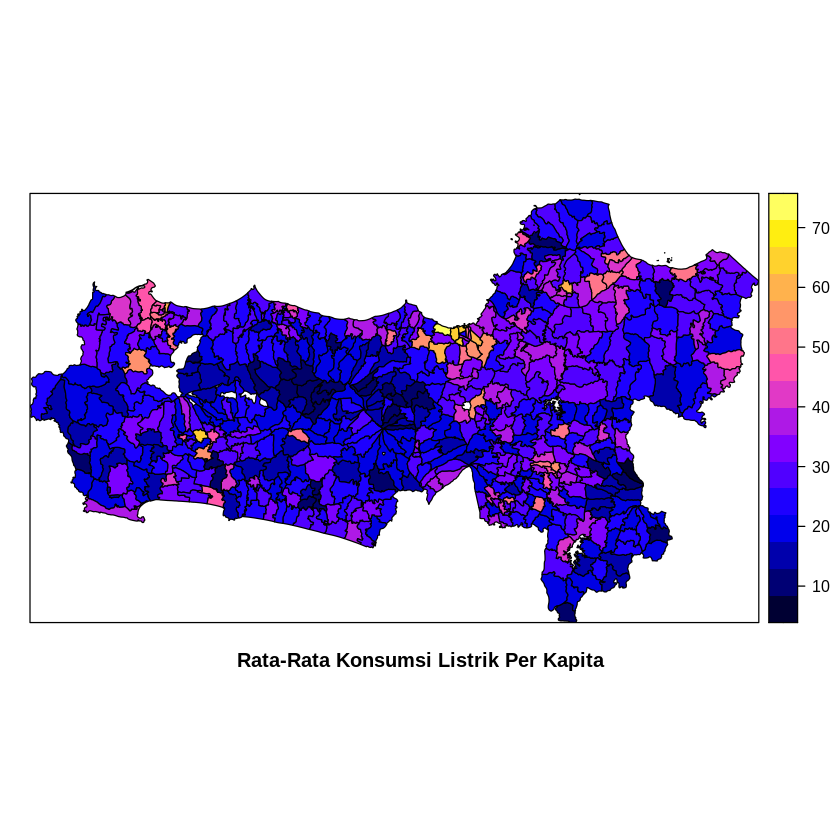

In [16]:
# Menghitung spatial weight
jatengmap <- readOGR("join_new_data.shp")
spplot(jatengmap, "LISTRIK", sub="Rata-Rata Konsumsi Listrik Per Kapita")

In [17]:
# Membentuk matriks pembobot spasial
jateng.map <- st_read("join_new_data.shp", quiet=TRUE)
queen.w <- poly2nb(as(jateng.map, "Spatial"), queen = T)
# Membentuk matriks bobot tipe queen yang telah distandarisasi
queen.w1 <- nb2mat(queen.w,style = "W")

In [20]:
queen.w1

1,0.0000000,0.3333333,0.3333333,0,0.00,0.00,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
2,0.2000000,0.0000000,0.2000000,0,0.20,0.00,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
3,0.1666667,0.1666667,0.0000000,0,0.00,0.00,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
4,0.0000000,0.0000000,0.0000000,0,0.00,0.00,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
5,0.0000000,0.2500000,0.0000000,0,0.00,0.25,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
6,0.0000000,0.0000000,0.0000000,0,0.25,0.00,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
7,0.0000000,0.0000000,0.0000000,0,0.00,0.00,0.0000000,0.2000000,0.2000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
8,0.0000000,0.0000000,0.0000000,0,0.00,0.00,0.2500000,0.0000000,0.2500000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
9,0.0000000,0.0000000,0.0000000,0,0.00,0.00,0.1428571,0.1428571,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
10,0.0000000,0.0000000,0.0000000,0,0.00,0.00,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
11,0.0000000,0.0000000,0.0000000,0,0.00,0.00,0.1428571,0.1428571,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0


# Estimasi Tak Langsung dengan Model SEBLUP-FH

In [21]:
# Model SEBLUP-FH 1 (8 variabel penyerta dari hasil backward elimination)
model_seblup_fh1 <- eblupSFH(hasil_est_lgsg$Konsumsi_Listrik_Kapita ~ data_x$bui_median + data_x$pm2.5_median + data_x$elevation_median + data_x$rwi_weighted + data_x$jlh_fas_pddk + data_x$jlh_sarana_eko + data_x$jlh_tmpt_ibdh + data_x$kepadatan_penduduk, vardir = hasil_est_lgsg$Var, proxmat = queen.w1, method="REML")
# Model SEBLUP-FH 2 (kepadatan penduduk diexclude)
model_seblup_fh2 <- eblupSFH(hasil_est_lgsg$Konsumsi_Listrik_Kapita ~ data_x$bui_median + data_x$pm2.5_median + data_x$elevation_median + data_x$rwi_weighted + data_x$jlh_fas_pddk + data_x$jlh_sarana_eko + data_x$jlh_tmpt_ibdh, vardir = hasil_est_lgsg$Var, proxmat = queen.w1, method="REML")
# Model SEBLUP-FH 3 (fasilitas pendidikan diexclude)
model_seblup_fh3 <- eblupSFH(hasil_est_lgsg$Konsumsi_Listrik_Kapita ~ data_x$bui_median + data_x$pm2.5_median + data_x$elevation_median + data_x$rwi_weighted + data_x$jlh_sarana_eko + data_x$jlh_tmpt_ibdh + data_x$kepadatan_penduduk, vardir = hasil_est_lgsg$Var, proxmat = queen.w1, method="REML")
# Model SEBLUP-FH 4 (fasilitas pendidikan dan kepadatan penduduk diexclude)
model_seblup_fh4 <- eblupSFH(hasil_est_lgsg$Konsumsi_Listrik_Kapita ~ data_x$bui_median + data_x$pm2.5_median + data_x$elevation_median + data_x$rwi_weighted + data_x$jlh_sarana_eko + data_x$jlh_tmpt_ibdh, vardir = hasil_est_lgsg$Var, proxmat = queen.w1, method="REML")

In [22]:
# Fit model SEBLUP-FH
model_seblup_fh1$fit

,beta,std.error,tvalue,pvalue
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),26.8590641755,2.588838901,10.374946,3.223941e-25
data_x$bui_median,10.5951989245,1.845681017,5.740536,9.437717e-09
data_x$pm2.5_median,0.1172118393,0.058422445,2.006281,4.482628e-02
data_x$elevation_median,-0.0062107656,0.001195661,-5.194420,2.053587e-07
data_x$rwi_weighted,1.2665045892,1.167020174,1.085247,2.778125e-01
data_x$jlh_fas_pddk,0.0204868000,0.010430631,1.964100,4.951853e-02
data_x$jlh_sarana_eko,0.0050851131,0.001082493,4.697594,2.632439e-06
data_x$jlh_tmpt_ibdh,-0.0118830901,0.004400777,-2.700226,6.929246e-03
data_x$kepadatan_penduduk,0.0002927714,0.000246680,1.186847,2.352879e-01


In [23]:
model_seblup_fh2$fit

,beta,std.error,tvalue,pvalue
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),27.230437653,2.569102741,10.599202,3.005352e-26
data_x$bui_median,11.411154424,1.712546083,6.663269,2.678037e-11
data_x$pm2.5_median,0.133358590,0.056810155,2.347443,1.890277e-02
data_x$elevation_median,-0.006186339,0.001194734,-5.178005,2.242712e-07
data_x$rwi_weighted,1.634923515,1.123373472,1.455370,1.455670e-01
data_x$jlh_fas_pddk,0.022407841,0.010298206,2.175897,2.956293e-02
data_x$jlh_sarana_eko,0.005370889,0.001054611,5.092769,3.528714e-07
data_x$jlh_tmpt_ibdh,-0.013613910,0.004153814,-3.277448,1.047499e-03


In [24]:
model_seblup_fh3$fit

,beta,std.error,tvalue,pvalue
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),27.3924622113,2.5682106558,10.665972,1.468559e-26
data_x$bui_median,10.8084078824,1.8427820130,5.865267,4.484115e-09
data_x$pm2.5_median,0.1167880887,0.0582811500,2.003874,4.508355e-02
data_x$elevation_median,-0.0062134308,0.0011963480,-5.193665,2.061940e-07
data_x$rwi_weighted,1.2039095247,1.1680312514,1.030717,3.026736e-01
data_x$jlh_sarana_eko,0.0058960331,0.0010020761,5.883818,4.009096e-09
data_x$jlh_tmpt_ibdh,-0.0058772946,0.0032211386,-1.824602,6.806118e-02
data_x$kepadatan_penduduk,0.0003680295,0.0002440257,1.508159,1.315139e-01


In [25]:
model_seblup_fh4$fit # model yang dipilih

,beta,std.error,tvalue,pvalue
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),27.939204442,2.5418488226,10.991686,4.190239e-28
data_x$bui_median,11.887116220,1.6979022434,7.001060,2.540323e-12
data_x$pm2.5_median,0.137476033,0.0566290761,2.427658,1.519666e-02
data_x$elevation_median,-0.006182242,0.0011957358,-5.170241,2.337925e-07
data_x$rwi_weighted,1.673235322,1.1251730362,1.487092,1.369906e-01
data_x$jlh_sarana_eko,0.006361230,0.0009531324,6.674026,2.488796e-11
data_x$jlh_tmpt_ibdh,-0.007381897,0.0030624207,-2.410478,1.593164e-02


# Ekstrak Hasil Estimasi Model

In [26]:
# Ekstrak hasil estimasi model SEBLUP-FH
y_seblup <- model_seblup_fh4$eblup
# Ekstrak koefisien ragam pengaruh acak dan koefisien autoregresi spasial
var_rand_seblup <- model_seblup_fh4$fit$refvar
cor_rand_seblup <- model_seblup_fh4$fit$spatialcorr
# Ekstrak nilai random effect area
jlh_baris <- nrow(dataset)
var_x_seblup <- matrix(c(data_x$bui_median + data_x$pm2.5_median + data_x$elevation_median + data_x$rwi_weighted + data_x$jlh_sarana_eko + data_x$jlh_tmpt_ibdh), nrow=jlh_baris, ncol=6)
beta_seblup <- matrix(model_seblup_fh4$fit$estcoef$beta, ncol = 1)
beta_seblup_no_intercept <- matrix(beta_seblup[-1,], ncol = 1)
gama_seblup <- model_seblup_fh4$fit$refvar/(model_seblup_fh4$fit$refvar+hasil_est_lgsg$Var)
y_mat <- matrix(hasil_est_lgsg$Konsumsi_Listrik_Kapita, ncol = 1)
rand_effect_seblup <- gama_seblup*(y_mat-var_x_seblup%*%beta_seblup_no_intercept)
# Ekstrak nilai residual
res_y_seblup <- hasil_est_lgsg$Konsumsi_Listrik_Kapita - y_seblup
# Uji normalitas random effect area dan residual
ks.test(rand_effect_seblup, "pnorm", mean(rand_effect_seblup), sd(rand_effect_seblup))
ks.test(res_y_seblup, "pnorm", mean(res_y_seblup), sd(res_y_seblup))
# Ekstrak nilai MSE dan RRMSE model SEBLUP-FH
mse_seblup <- mseSFH(hasil_est_lgsg$Konsumsi_Listrik_Kapita ~ data_x$bui_median + data_x$pm2.5_median + data_x$elevation_median + data_x$rwi_weighted + data_x$jlh_sarana_eko + data_x$jlh_tmpt_ibdh, hasil_est_lgsg$Var, proxmat = queen.w1, method="REML")
mse_sfh <- round(mse_seblup$mse, 5)
rrmse_sfh <- round((sqrt(mse_sfh)/y_seblup)*100, 5)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  rand_effect_seblup
D = 0.041992, p-value = 0.2654
alternative hypothesis: two-sided


Warning message in ks.test.default(res_y_seblup, "pnorm", mean(res_y_seblup), sd(res_y_seblup)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  res_y_seblup
D = 0.24921, p-value < 2.2e-16
alternative hypothesis: two-sided


# Ekspor Hasil Estimasi

In [27]:
data_est_seblupFH <- cbind(hasil_est_lgsg[,c(1,2,3)], y_seblup, mse_sfh, rrmse_sfh)
names(data_est_seblupFH) <- c("No", "KodeKec", "NamaKec", "Penduga_SEBLUP_FH", "MSE_SEBLUP_FH", "RRMSE_SEBLUP_FH")
# write.csv(data_est_seblupFH, "E:/FOLDER KULIAH/STIS/SEMESTER 7/SKRIPSI/HASIL_RUNNING_MODEL/Hasil_Estimasi_SEBLUP_FH.csv")
data_est_seblupFH

,No,KodeKec,NamaKec,Penduga_SEBLUP_FH,MSE_SEBLUP_FH,RRMSE_SEBLUP_FH
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1,3301010,Dayeuhluhur,23.20212,4.37630,9.01625
2,2,3301020,Wanareja,16.70319,3.12958,10.59116
3,3,3301030,Majenang,19.90310,5.15956,11.41263
4,4,3301040,Cimanggu,20.30651,7.37615,13.37456
5,5,3301050,Karangpucung,21.50515,18.42243,19.95864
6,6,3301060,Cipari,14.63868,0.56927,5.15415
7,7,3301070,Sidareja,26.61078,14.96577,14.53757
8,8,3301080,Kedungreja,14.67909,5.83817,16.46036
9,9,3301090,Patimuan,18.87031,6.79422,13.81309
